# StumbleUpon Evergreen Classification Challenge
##### DAHAMOU ABDELILAH

## Data analysis

In [50]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import pandas as pd

import numpy as np

C:\Users\HP\AppData\Local\Temp\ipykernel_8792\1841837785.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [95]:
raw_df = pd.read_csv('train.tsv', sep='\t')
df = raw_df.copy()
del df['framebased']
del df['urlid']
del df['alchemy_category_score']
df['is_news'] = df['is_news'].str.replace('?','0').astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_8792\4111016664.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['is_news'] = df['is_news'].str.replace('?','0').astype(int)


In [90]:
df.sample(6)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
3626,http://techcrunch.com/2013/04/15/google-releas...,3892,"{""url"":""techcrunch 2013 04 15 google releases ...",computer_internet,0.889003,3.153374,0.505376,0.204301,0.118280,0.059140,...,1,1,38,0,4009,186,9,0.284946,0.071170,1
2862,http://www.avig.com/nutrition/fat-burning-foods/,5147,"{""title"":""Fat Burning Foods Avig com "",""body"":...",health,0.805507,1.595745,0.744681,0.319149,0.191489,0.021277,...,1,0,10,0,3511,47,4,0.000000,0.084646,1
6898,http://www.totalprosports.com/2010/07/06/dutch...,7604,"{""title"":""Dutch Player Demy De Zeeuw Kicked In...",?,?,1.317460,0.393939,0.060606,0.000000,0.000000,...,1,0,33,0,783,66,6,0.000000,0.088757,0
2424,http://www.nannywebsites.com/blog/10-things-ki...,9177,"{""url"":""nannywebsites blog 10 things kids born...",religion,0.396329,2.395833,0.705882,0.470588,0.117647,0.039216,...,1,1,13,0,3516,51,7,0.000000,0.113154,0
3248,http://spacedust.atspace.com/egg_roll_sign.html,3997,"{""title"":""you give me egg roll me love you lon...",recreation,0.674617,1.714286,0.000000,0.000000,0.000000,0.000000,...,0,0,52,0,43,16,3,0.062500,0.023810,0
2620,http://www.bakingglory.com/breads/cinnamon-roses/,5893,"{""title"":""Cinnamon Roses Baking for the Masses...",?,?,1.072165,0.414141,0.070707,0.010101,0.000000,...,1,0,9,0,4779,99,3,0.020202,0.083086,1


In [52]:
df.sample(5).T

,4294,218,5980,4946,112
url,http://eatathomecooks.com/2010/05/snickerdoodl...,http://www.instructables.com/tag/type-id/categ...,http://www.laurenslatest.com/lasagna-cups,http://www.great-chicago-italian-recipes.com/z...,http://community.livejournal.com/t_shirt_surge...
urlid,3047,7869,1559,7960,2331
boilerplate,"{""url"":""eatathomecooks 2010 05 snickerdoodle m...","{""title"":""Food Breakfast How to Make Instructa...","{""url"":""laurenslatest lasagna cups"",""title"":""L...","{""title"":""Zabaglione with Berries "",""body"":""BE...","{""title"":""Snip and twist t shirt butchering Tu..."
alchemy_category,?,recreation,?,recreation,arts_entertainment
alchemy_category_score,?,0.524341,?,0.588152,0.827595
avglinksize,1.894118,0.931034,2.981928,0.85567,1.212435
commonlinkratio_1,0.655172,0.240566,0.644737,0.265306,0.422222
commonlinkratio_2,0.321839,0.056604,0.328947,0.010204,0.035556
commonlinkratio_3,0.264368,0.009434,0.289474,0.0,0.008889
commonlinkratio_4,0.178161,0.004717,0.27193,0.0,0.0


In [53]:
df.label.mean()
df['alchemy_category']

0                 business
1               recreation
2                   health
3                   health
4                   sports
               ...        
7390     computer_internet
7391      culture_politics
7392            recreation
7393    arts_entertainment
7394                     ?
Name: alchemy_category, Length: 7395, dtype: object

<AxesSubplot:ylabel='alchemy_category'>

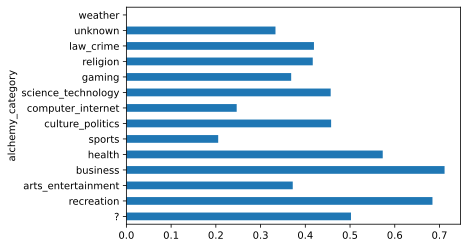

In [42]:
df.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)['mean'].plot.barh()

<AxesSubplot:>

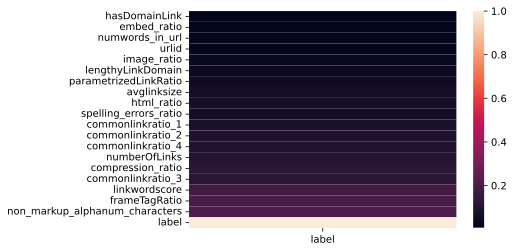

In [54]:
import seaborn as sns
sns.heatmap(df.corr('spearman').abs()[['label']].sort_values('label'))

<AxesSubplot:>

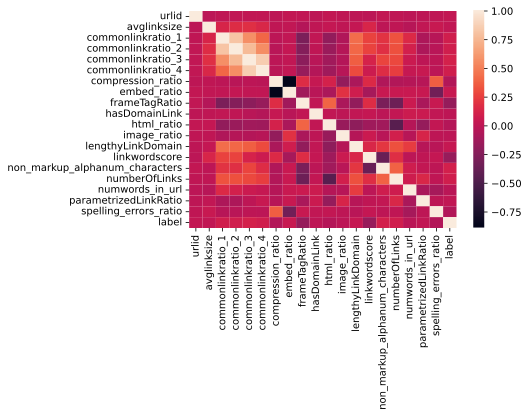

In [44]:
sns.heatmap(df.corr())

<AxesSubplot:>

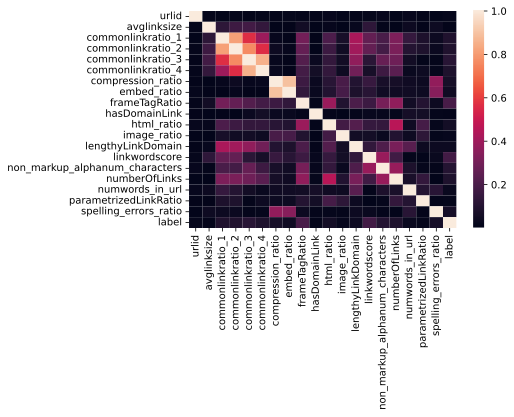

In [55]:
sns.heatmap(df.corr().abs())

<AxesSubplot:xlabel='label', ylabel='non_markup_alphanum_characters'>

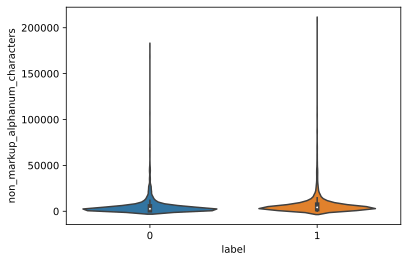

In [59]:
sns.violinplot(x='label', y='non_markup_alphanum_characters', data=df)

In [60]:
features_df = df.drop('label', axis=1)
num_features = features_df.select_dtypes(np.number)
num_features.sample(5)

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
6572,1124,2.311927,0.416000,0.152000,0.048000,0.016000,0.425532,0.00000,0.044266,0,0.256619,0.113636,1,51,1326,125,3,0.312000,0.159420
3448,7169,1.892857,0.586466,0.421053,0.157895,0.090226,0.378421,0.00000,0.030521,0,0.274990,0.020904,1,7,12044,133,9,0.037594,0.076414
3771,719,2.757962,0.426316,0.221053,0.115789,0.015789,0.565294,0.00000,0.046768,0,0.257749,0.226994,1,23,7409,190,3,0.210526,0.071006
2299,10062,0.791774,0.254950,0.099010,0.019802,0.004950,0.563425,0.00565,0.019629,0,0.157831,1.084746,0,22,5536,404,0,0.358911,0.128655
3546,10372,2.285714,0.000000,0.000000,0.000000,0.000000,1.512821,0.00000,0.170000,0,0.340266,0.333333,0,24,239,8,2,0.000000,0.076923


In [61]:
num_features.columns

Index(['urlid', 'avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'],
      dtype='object')

In [62]:
num_features.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


In [67]:
cat_features['is_news'].

<bound method Series.count of 0       1
1       1
2       1
3       1
4       1
       ..
7390    1
7391    1
7392    ?
7393    1
7394    ?
Name: is_news, Length: 7395, dtype: object>

In [97]:
cat_features = df.select_dtypes(include=[np.object])
cat_features = cat_features[['alchemy_category', 'news_front_page']]
cat_features.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_8792\4014009409.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = df.select_dtypes(include=[np.object])


,alchemy_category,news_front_page
0,business,0
1,recreation,0
2,health,0
3,health,0
4,sports,0


In [81]:
cat_features.is_news.value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [94]:
pd.get_dummies(cat_features).head(5)

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Modeling

In [98]:
# More robust way to do feature pre-processing.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

features_df = df.drop('label', axis=1)
FEATURE_COLUMNS = features_df.columns
NUM_FEATURES = features_df.select_dtypes(include=[np.number]).columns
CAT_FEATURES = ['alchemy_category', 'news_front_page']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
  transformers=[
      ('num', numeric_transformer, NUM_FEATURES),
      ('cat', categorical_transformer, CAT_FEATURES)
  ])

In [99]:
features_df = preprocessor.fit_transform(df.drop('label', axis=1))
features_df.shape

(7395, 36)

In [105]:
features_df

array([[-0.08194111,  1.02520913, -0.05586734, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.10629082,  0.19589891,  0.50902122, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04396462,  0.46172309,  0.73347932, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.08838666, -0.75049855, -0.29323563, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20135342, -1.26873084, -1.10028781, ...,  0.        ,
         1.        ,  0.        ],
       [-0.18605119,  0.18553935,  1.46466303, ...,  0.        ,
         0.        ,  1.        ]])

In [101]:
target = df['label']
target.shape

(7395,)

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25)

In [118]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

baseline = DummyClassifier(strategy='most_frequent')
#model0 = LogisticRegressionCV()
model = RandomForestClassifier()

In [119]:
baseline.fit(x_train, y_train)
model.fit(x_train, y_train)

RandomForestClassifier()

In [120]:
from sklearn.metrics import classification_report
baseline_predictions = baseline.predict(x_test)
model_predictions = model.predict(x_test)
#model_predictions0 = model0.predict(x_test)


In [121]:
print(classification_report(y_test, baseline_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       895
           1       0.52      1.00      0.68       954

    accuracy                           0.52      1849
   macro avg       0.26      0.50      0.34      1849
weighted avg       0.27      0.52      0.35      1849



c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       895
           1       0.73      0.71      0.72       954

    accuracy                           0.71      1849
   macro avg       0.71      0.72      0.71      1849
weighted avg       0.72      0.71      0.72      1849



## Submission

In [122]:
test_df = pd.read_csv('test.tsv', sep='\t')
test_df['is_news'] = test_df['is_news'].str.replace('?', '0').astype(int) 

C:\Users\HP\AppData\Local\Temp\ipykernel_8792\2422728146.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['is_news'] = test_df['is_news'].str.replace('?', '0').astype(int)


In [123]:
sub_model = RandomForestClassifier()
sub_model.fit(features_df, target)

test_features = preprocessor.transform(test_df[df.drop('label', axis=1).columns])
predictions = sub_model.predict(test_features)

In [124]:
sub_df = pd.DataFrame({'urlid' : test_df.urlid, 'label': predictions})
sub_df.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [125]:
sub_df.to_csv('submission.csv', index=False)

### FIN